# YZV 211E Homework 2
### Prepared by Res. Asst. Zehra Demir
If you have any questions regarding the assignment, you can contact the T.A. Zehra Demir (demirz20@itu.edu.tr).

In this assignment, we will examine the **Iris Flower Dataset**, one of the most well-known classification datasets included in Scikit-Learn. We will explore the dataset, preprocess it, train multiple machine learning models, visualize class separation, and evaluate their performance.

**Important:**
* **Run the notebooks before the submission.**

***IMPORTANT: Academic Integrity & Tools Policy. Your submission must be entirely your own work. You may discuss ideas at a high level, but do not share or copy code, data, text, or plots. Use of AI tools is strictly prohibited. You may consult official documentation or textbooks, but cite all non-AI sources and write every line of code and text yourself. Submissions may be checked for plagiarism and AI-assisted writing.***

### Name-Surname: Ömer Türk
### Student ID: 150240323

## 🌸 Introduction to the Iris Dataset

The **Iris Dataset** is one of the most famous datasets in machine learning.

It contains measurements from **three different species of iris flowers**:

| Numeric Label | Species Name |
|---------------|--------------|
| 0             | Setosa       |
| 1             | Versicolor   |
| 2             | Virginica    |

For each flower, four measurements are recorded:

| Feature | Description |
|---------|-------------|
| `sepal length` | length of the sepal (cm) |
| `sepal width`  | width of the sepal (cm)  |
| `petal length` | length of the petal (cm) |
| `petal width`  | width of the petal (cm)  |

A **sepal** is the outer green part of the flower, while a **petal** is the colorful inner part (what we usually think of as flower petals).

Goal of our machine learning model:
> Given the measurements of a flower (numbers), predict the species (category label).

This is a **multiclass classification problem** with 3 classes.

## (10 pts) Q1 — Load the Dataset & Basic Exploration

**Goal:** understand the dataset structure and features.

### Tasks:
1. Load the iris dataset using `from sklearn.datasets import load_iris`.
2. Convert to a pandas DataFrame.
3. Print:
   - First 5 rows
   - Shape (rows, columns)
   - Column (feature) names
   - Target names (species)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris() # loading the dataset
df = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names
)
df["species"] = iris.target_names[iris.target] # iris.target is an array full of 0,1,2 and we need to convert them to related classes

In [2]:
df.head() # shows first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape # shows shape

(150, 5)

In [4]:
df.columns.tolist()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

In [5]:
df["species"].unique().tolist() # shows target values and their amount

['setosa', 'versicolor', 'virginica']

## (10 pts) Q2 — Summary Statistics & Class Distribution

**Goal:** understand basic descriptive statistics and class balance of the dataset.

### Tasks:
1. Use `DataFrame.describe()` to display summary statistics (mean, min/max, std, etc.) for numerical features.
2. Visualize the **class distribution** (number of samples per flower species) using a **countplot** (`seaborn.countplot()`).

### Expected Output:
- Table of summary descriptive statistics
- A bar chart showing how many samples exist for each flower species

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df.describe() # shows some statistics about dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='count'>

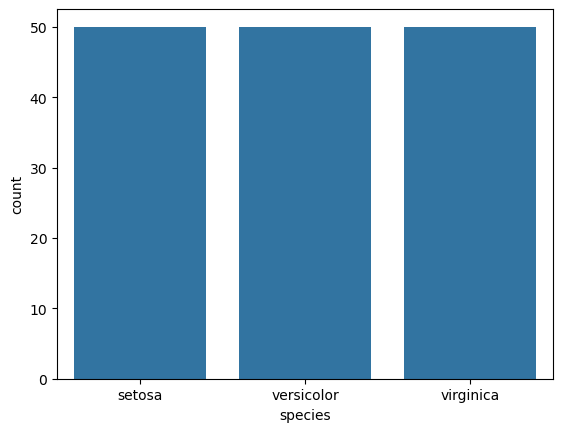

In [8]:
sns.countplot(data=df, x="species") # shows amount of sample for each species

  ### **Is the dataset balanced? Why does this matter for classification?**
    
    Answer: Yes, it is balanced. This matters because we want our models to have equal amount of the classes so that it will not have a bias because of having too much or too low of a class. With being equal, our model is gonna have a high change of predicting true class without getting affected by any unfairness.

## (15 pts) Q3 — Train/Test Split + Scaling

**Goal:** prepare data for machine learning modeling by splitting and scaling properly.

### Tasks:
1. Split the dataset into **train (80%)** and **test (20%)** using `train_test_split()`.
   - Use a `random_seed` (e.g., `random_state=42`) to ensure reproducibility.
2. Apply **feature scaling (`StandardScaler`) only on the training set**, then transform the test set using the same scaler.
   - **Do NOT scale the full dataset before splitting.**

Hint: `fit_transform()` train set and only `transform()` test set.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# we need to split our dataset into features and classes before splitting into train and test.
X = df.drop(columns="species")
y = df["species"].map({"setosa":0,"versicolor":1,"virginica":2})
# now we can split our data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=42)

In [11]:
scaler = StandardScaler() # we create a scaler in here
# first, fit only the train data and transform it
# after, scale test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


  ### **Why scaling is applied only on the train split? Why do we need it? (short explanation)**
    
    Answer: It is applied only on the train split to prevent data leakage. If we scale on the entire dataset, information from the test distribution would leak to the train distribution, causing unrealistic results.

## (20 pts) Q4 — Train Multiple Models & Compare Performance

**Goal:** Train different machine learning models and compare their classification performance.

### Tasks:
1. Train at least **three different models** (choose from the list below):
   - Logistic Regression
   - K-Nearest Neighbors (KNN)
   - Support Vector Machine (SVM)
   - Random Forest
2. Use **cross-validation (5-fold)** on the training set to measure model accuracy.
3. Store the average accuracy of each model in a **DataFrame**.
4. Visualize model performance with a **bar chart**.

### Requirements:
- Use the already scaled data: `X_train_scaled` and `X_test_scaled`

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

models = {
    "LogisticRegression":LogisticRegression(max_iter=200),
    "KNN":KNeighborsClassifier(n_neighbors=5),
    "SVM":SVC(kernel="rbf"),
    "RandomForest":RandomForestClassifier(n_estimators=100)
}

In [14]:
results={}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
    results[name] = cv_scores.mean()  # average accuracy

In [15]:
df_results = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
df_results

,Accuracy
LogisticRegression,0.958333
KNN,0.925000
SVM,0.950000
RandomForest,0.958333


Text(0.5, 1.0, 'Model Performance Comparison (5-fold CV)')

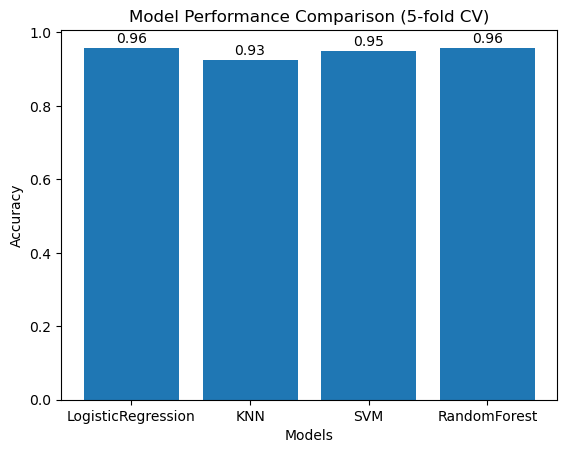

In [16]:
bars = plt.bar(df_results.index, df_results["Accuracy"])
for i, bar in enumerate(bars):
    plt.text(i, bar.get_height() + 0.005, f"{bar.get_height():.2f}", ha='center', va='bottom')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison (5-fold CV)")

  ### **Which model performed best at this stage? Why do we use cross-validation instead of only a single train/test accuracy?**
    
    Answer: According to the 5-fold cross-validation results, LogisticRegression performed the best. We use cross-validation because it divides the training data into multiple folds, trains the model on different subsets, and evaluates on the remaining fold, then take mean of the accuracies for each fold. Therefore, it gives us a more reliable and average value than a single train/test accuracy.

## (20 pts) Q5 — Hyperparameter Tuning with GridSearchCV

**Goal:** Improve the best model from Q4 using hyperparameter tuning.

### Tasks:
1. Choose the best-performing model from Q4.
2. Use `GridSearchCV` with 5-fold cross-validation to search for the best hyperparameters.
3. Print:
   - Best parameters
   - Best cross-validation accuracy

### Requirements:
- Use `X_train_scaled` and `y_train` (scaled training data)
- Do not retrain manually — let GridSearch handle fitting

In [17]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'penalty':['l1', 'l2'],
    'C': np.logspace(-2, 3, 6),
    'solver': ['liblinear'],
}

# GridSearchCV will decide the best parameters for our model
grid = GridSearchCV(
    estimator=models["LogisticRegression"],
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [18]:
print("Best parameters:",grid.best_params_)
print("Best score:",grid.best_score_)

Best parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.9583333333333334


  ### **Did hyperparameter tuning improve the model? Why is hyperparameter tuning important?**
    
    Answer: In this case, hyperparameter tuning did not improve the model accuracy, because the best cross-validation score after GridSearchCV is the same as the original model’s CV accuracy. This means that the default hyperparameters were already close to optimal for this dataset. However, hyperparameter tuning is still important because it systematically searches for the best parameter combination. Even if the accuracy does not increase, hyperparameter tuning confirms that the chosen model is already using the best configuration.

## (15 pts) Q6 — Final Model Evaluation (Confusion Matrix + Classification Report)

**Goal:** Evaluate how well the tuned model performs on unseen data.

### Tasks:
1. Use the **best tuned model** from Q5. **Hint: Get it with `grid.best_estimator_`.**
2. Predict using the test set (`X_test_scaled`).
3. Visualize:
   - **Confusion Matrix**
   - **Classification Report** (precision, recall, f1-score)

### Notes:
- The confusion matrix will show how many samples were correctly or incorrectly classified.

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Text(0.5, 1.0, 'Confusion Matrix')

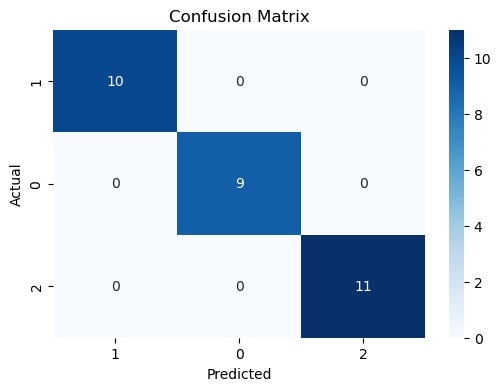

In [20]:
y_pred = grid.best_estimator_.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



  ### **Which classes (if any) were misclassified? What does this tell us about the model's performance?**
    
    Answer: No classes were misclassified, every instance was predicted correctly. This indicates that the model achieved perfect performance on the test set. However, perfect accuracy can also mean overfitting or the test set being too small.


## (10 pts) Q7 — PCA Visualization (Dimensionality Reduction)

**Goal:** Reduce the dataset from 4 dimensions to 2 using PCA and visualize how well the classes separate.  

### Tasks:
1. Apply **Principal Component Analysis (PCA)** and reduce `X_train_scaled` to 2 components.
2. Create a scatter plot of the transformed data.
   - Color the points by species (target class)
   - Label axes as `PC1` and `PC2`
3. Add a title and legend to make the plot readable.

> Hint: Use `PCA(n_components=2)` from scikit-learn.

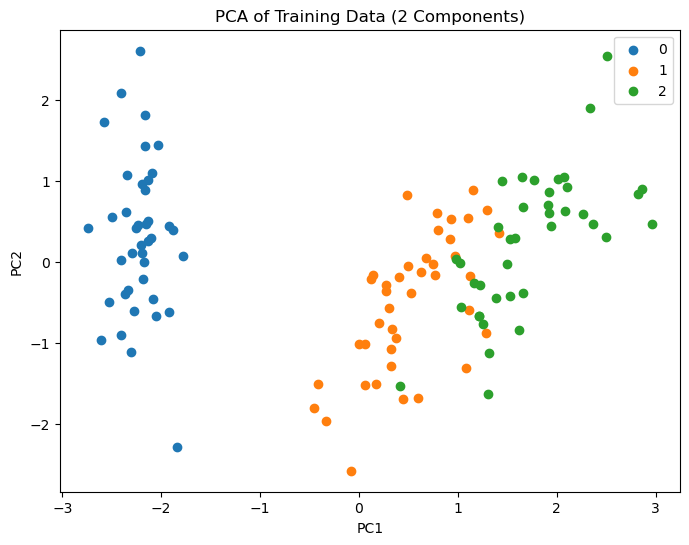

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # Create the PCA object
X_pca = pca.fit_transform(X_train_scaled)

# Scatter plot
plt.figure(figsize=(8,6))

# Plotting
colors = {0:'red',1:'green',2:'blue'}
for species, color in enumerate(colors):
    plt.scatter(X_pca[y_train==species, 0], X_pca[y_train==species, 1],label=species)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Training Data (2 Components)')
plt.legend()
plt.show()

  ### **Based on the visualization, are the classes well separated? Which species appears easiest/hardest for the model to distinguish?**
    
    Answer: Classes are not well separated. Although setosa(0) differs from the other species, versicolor(1) and virginica(2) could not be separated properly. This means the model may easily distinguish setosa, but it may struggle to differ between versicolor and virginica because their feature distributions overlap in the reduced PCA space. In other words, PCA shows that these two species share similar patterns, making them the hardest pair to classify.